In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("breast-cancer-wisconsin.data",header=None)
df.columns = ['SampleCodeNumber','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']

In [22]:
len(df)

699

In [23]:
df.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
df_modified = df
for col in df_modified.columns:
    df_modified[col].replace({'?':'1'}, inplace=True)
len(df_modified)

699

In [25]:
X = np.asarray(df_modified[['ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion'
                         ,'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']])
Y = np.asarray(df_modified[['Class']])
Y = Y.ravel()
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )  
classifier.fit(X_train, Y_train) 
Y_predict = classifier.predict(X_test)

KNN's Accuracy:  0.9795918367346939


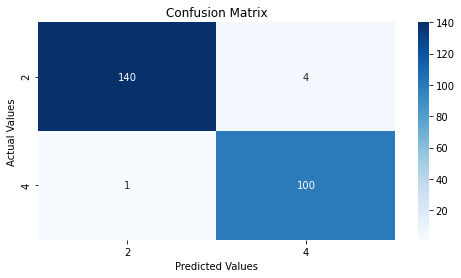

In [26]:
cm = metrics.confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("KNN's Accuracy: ", metrics.accuracy_score(Y_test, Y_predict))

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_predict2 = gnb.predict(X_test)

Naive Bayes's Accuracy:  0.9714285714285714


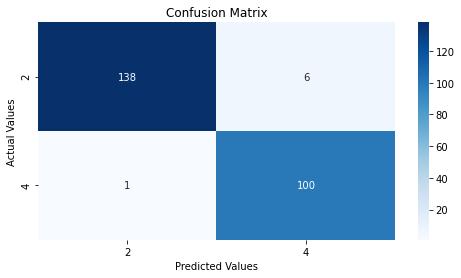

In [28]:
cm = metrics.confusion_matrix(Y_test,Y_predict2)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Naive Bayes's Accuracy: ", metrics.accuracy_score(Y_test, Y_predict2))

In [29]:
from sklvq import GLVQ

lvq = GLVQ(
    distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1},
)

lvq.fit(X_train, Y_train)
Y_predict3 = lvq.predict(X_test)

LVQ's Accuracy:  0.9795918367346939


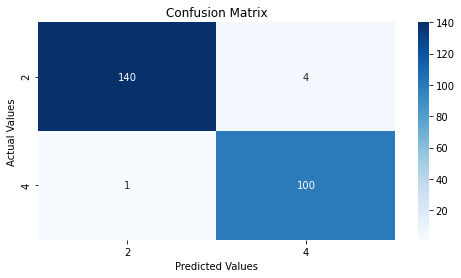

In [30]:
cm = metrics.confusion_matrix(Y_test,Y_predict3)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("LVQ's Accuracy: ", metrics.accuracy_score(Y_test, Y_predict3))